In [3]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
%matplotlib inline

In [6]:
Xaxis, Yaxis = np.linspace(-10,10,100), np.linspace(-10,10,100)
X, Y = np.meshgrid(Xaxis, Yaxis)

In [46]:
def f(X,Y):
    return 1.0 + 0.01*Y - 0.05/(1 + X**2) + 0.001*np.random.randn()

In [47]:
points = []
values = []
for i in range(0,len(X)):
    for j in range(0,len(X[0])):
        points.append([X[i,j], Y[i,j]])
        values.append(f(X[i,j], Y[i,j]))

In [48]:
from scipy.interpolate import griddata
grid = griddata(np.array(points), np.array(values), (X,Y), method='cubic')

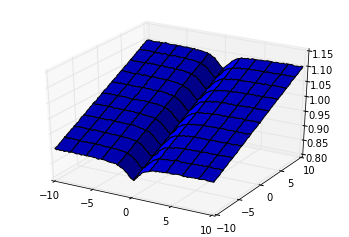

In [49]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X,Y,grid)

In [21]:
import urllib3.request
import json

def get_elevation(lat, lng, sensor=False):
    ELEVATION_BASE_URL = 'http://maps.google.com/maps/api/elevation/json'
    URL_PARAMS= 'locations=%.7f,%.7f&sensor=%s' % (lat, lng, sensor)
    url = ELEVATION_BASE_URL + "?" + URL_PARAMS
    
    with urllib3.request.urlopen(url) as f:
        response = json.loads(f.read().decode())
        
    status = response["status"]
    if status == "OK":
        result = response["results"][0]
        elevation = float(result["elevation"])
        lat = float(result["location"]["lat"])
        lng = float(result["location"]["lng"])
    else:
        elevation = lat = lng = None
    return (elevation, lat, lng, status)

In [30]:
"%.7f" % np.pi

'3.1415927'

In [23]:
import urllib3

In [24]:
http = urllib3.PoolManager()

In [35]:
r = http.request('GET', 
'http://maps.google.com/maps/api/elevation/json?locations=%0.0000000,0.0000000')

In [36]:
r.data

'{\n   "error_message" : "Invalid request. Invalid \'locations\' parameter.",\n   "results" : [],\n   "status" : "REQUEST_DENIED"\n}\n'